In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()
# psngrid = continius, survived = categorical-ordinal, Pclass = categorical- ordinal, name = continious, sex = categorical- nominal, age=continious, SibSp=continious, parch=continious,ticket= conitious, fare= continious,Cabin= continious ,Embarked= categorical-nominal

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
df.info()
# df.Age.min()
# df.Age.max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [143]:
size_dict = {'S': 0, 'C':1, 'Q':2}
items = df.Embarked.dropna()
encoded_items = items.map(lambda x: size_dict[x])
asp =pd.DataFrame({"Embarked":items, "Encoded_Rank":encoded_items})


In [144]:
df = pd.get_dummies(df, columns=['Sex'])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


<Figure size 720x360 with 0 Axes>

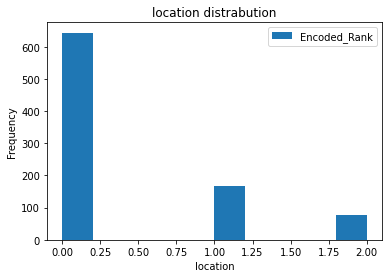

In [117]:
plt.figure(figsize= (10,5))
asp.plot(kind="hist")
plt.xlabel('location')
plt.title('location distrabution')
plt.show()

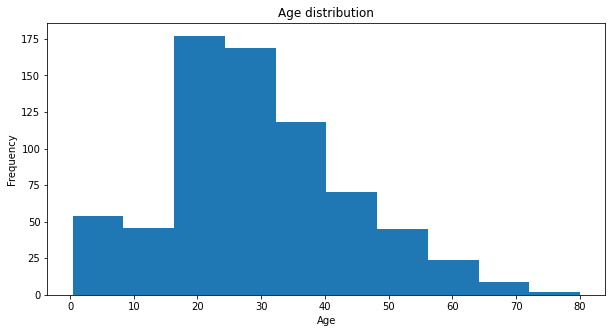

In [90]:
plt.figure(figsize= (10,5))
df.Age.plot(kind="hist")
plt.xlabel('Age')
plt.title('Age distribution')
plt.show()

In [123]:
means = df[['Sex', 'Age']].groupby('Sex').mean()
df['Age_transformed'] = df['Sex'].dropna().apply(lambda x: means.loc[x, "Age"])
df[['Sex', 'Age_transformed', 'Sex']].head()

,Sex,Age_transformed,Sex
0,male,30.726645,male
1,female,27.915709,female
2,female,27.915709,female
3,female,27.915709,female
4,male,30.726645,male


In [136]:
means = df[['Sex', 'Fare']].groupby('Sex').mean()
df['Fare_transformed'] = df['Sex'].dropna().apply(lambda x: means.loc[x, "Fare"])
df[['Sex', 'Fare_transformed', 'Sex']].head()
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

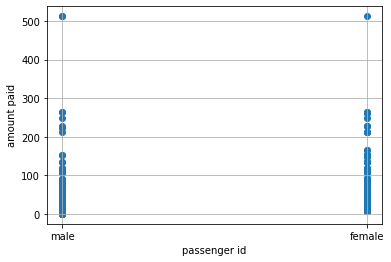

In [150]:
plt.scatter(df['Sex'], df["Fare"])
plt.xlabel('passenger id')
plt.ylabel('amount paid')
plt.grid()

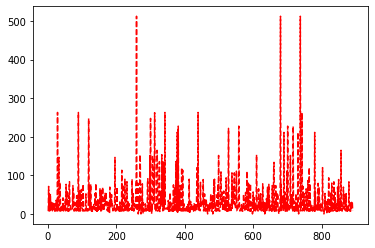

In [91]:
plt.plot(df.PassengerId, df["Fare"], "r--") 
plt.show()

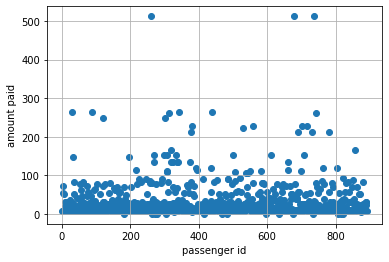

In [92]:
plt.scatter(df.PassengerId, df["Fare"])
plt.xlabel('passenger id')
plt.ylabel('amount paid')
plt.grid() 

In [108]:
df.Age.dropna()
df['Agebinned'] = pd.cut(df.Age, bins=range(0, 81, 8), retbins=False,include_lowest=True)
df.Agebinned.dropna()
dr = pd.get_dummies(df, columns=['Agebinned'])
dr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Agebinned_(-0.001, 8.0]","Agebinned_(8.0, 16.0]","Agebinned_(16.0, 24.0]","Agebinned_(24.0, 32.0]","Agebinned_(32.0, 40.0]","Agebinned_(40.0, 48.0]","Agebinned_(48.0, 56.0]","Agebinned_(56.0, 64.0]","Agebinned_(64.0, 72.0]","Agebinned_(72.0, 80.0]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,1,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,1,0,0,0,0,0,0


TypeError: tuple.count() takes exactly one argument (0 given)

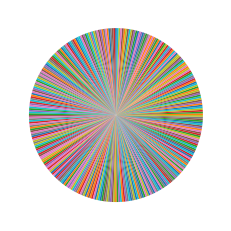

In [109]:
# fig, ax = plt.subplots(1,1,figsize=(13,6)
# df['Sex'].plot(kind='pie')
# plt.pie(df['Sex_female'])
plt.pie(df.Sex == 'female').count()
# plt.show()